# WeatherPy
----


In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import openweathermapy as owm
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

    

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


#cities

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
import time 

query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial=&APPID=" + api_key

# Starting URL for Weather Map API Call
weather_df = pd.DataFrame()
count = 1
sets = 1
error = 0
index = 0
t0 =time.time()

settings = {"units": "imperial", "appid": api_key}

print("Beginning Data Retrieval")
print("-------------------------------")


for city in cities:
    try:
        #city1 = city.replace(" ", "%20") 
        print(f'Processing Record {count} of Set {sets} | {city}' )
        city_stats = owm.get_current(city, **settings)
        weather_df.set_value(index, "City", city_stats["name"])
        weather_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        weather_df.set_value(index, "Country", city_stats("sys.country"))
        weather_df.set_value(index, "Date", city_stats("dt"))
        weather_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        weather_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        weather_df.set_value(index, "Lat", city_stats("coord.lat"))
        weather_df.set_value(index, "Lng", city_stats("coord.lon"))
        weather_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1
    except Exception as e:
        print(f"City not found. Skipping...")
        pass
        error= error+1
    count = count+1
    if count == 50:
        t1=time.time()
        count = 1
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | ahipara


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_l

Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | port lincoln
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | ussuriysk
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | flagstaff
Processing Record 12 of Set 1 | svelgen
Processing Record 13 of Set 1 | mitzic
Processing Record 14 of Set 1 | geraldton
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | atambua
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | tilichiki
Processing Record 19 of Set 1 | krasnoshchekovo
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | sola
Processing Record 23 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 24 of Set 1 | mataura
Processing Record 25 of

Processing Record 42 of Set 4 | tazovskiy
Processing Record 43 of Set 4 | manaure
Processing Record 44 of Set 4 | pesaro
Processing Record 45 of Set 4 | mets masrik
Processing Record 46 of Set 4 | cabo san lucas
Processing Record 47 of Set 4 | belmonte
Processing Record 48 of Set 4 | kutum
Processing Record 49 of Set 4 | bargarh
Processing Record 1 of Set 5 | maldonado
Processing Record 2 of Set 5 | sisophon
Processing Record 3 of Set 5 | saleaula
City not found. Skipping...
Processing Record 4 of Set 5 | tabou
Processing Record 5 of Set 5 | amapa
Processing Record 6 of Set 5 | igurubi
Processing Record 7 of Set 5 | tarauaca
Processing Record 8 of Set 5 | nybro
Processing Record 9 of Set 5 | natchez
Processing Record 10 of Set 5 | ancud
Processing Record 11 of Set 5 | sheffield lake
Processing Record 12 of Set 5 | asmar
Processing Record 13 of Set 5 | lasa
Processing Record 14 of Set 5 | fortuna
Processing Record 15 of Set 5 | harindanga
Processing Record 16 of Set 5 | flinders
Process

Processing Record 41 of Set 8 | svetlyy
City not found. Skipping...
Processing Record 42 of Set 8 | matara
Processing Record 43 of Set 8 | sakakah
City not found. Skipping...
Processing Record 44 of Set 8 | adelaide
Processing Record 45 of Set 8 | brookings
Processing Record 46 of Set 8 | otjiwarongo
Processing Record 47 of Set 8 | tiznit
Processing Record 48 of Set 8 | celestun
Processing Record 49 of Set 8 | wattegama
Processing Record 1 of Set 9 | freeport
Processing Record 2 of Set 9 | vung tau
Processing Record 3 of Set 9 | port elizabeth
Processing Record 4 of Set 9 | jiguani
Processing Record 5 of Set 9 | zambezi
Processing Record 6 of Set 9 | jatai
Processing Record 7 of Set 9 | hasaki
Processing Record 8 of Set 9 | aplahoue
Processing Record 9 of Set 9 | laguna
Processing Record 10 of Set 9 | hervey bay
Processing Record 11 of Set 9 | evensk
Processing Record 12 of Set 9 | naze
Processing Record 13 of Set 9 | machilipatnam
Processing Record 14 of Set 9 | kuche
City not found. 

Processing Record 31 of Set 12 | murillo
Processing Record 32 of Set 12 | along
Processing Record 33 of Set 12 | uromi
Processing Record 34 of Set 12 | mossendjo
Processing Record 35 of Set 12 | arman
Processing Record 36 of Set 12 | altagracia de orituco
Processing Record 37 of Set 12 | yavas
Processing Record 38 of Set 12 | guamal
Processing Record 39 of Set 12 | williams lake
Processing Record 40 of Set 12 | catuday
Processing Record 41 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 42 of Set 12 | puri
Processing Record 43 of Set 12 | cape canaveral
Processing Record 44 of Set 12 | nioro
Processing Record 45 of Set 12 | canatlan
Processing Record 46 of Set 12 | sibolga
Processing Record 47 of Set 12 | suzun
Processing Record 48 of Set 12 | batemans bay
Processing Record 49 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 1 of Set 13 | lavrentiya
Processing Record 2 of Set 13 | half moon bay
Processing Record 3 of Set 13 | bathsheba

In [18]:
#city_stats = owm.get_current("ushuaia", **settings)
#city_stats

#city_stats["name"]
#city_stats("clouds.all")
#city_stats("sys.country")
#city_stats("dt")
#city_stats("main.temp_max")
#city_stats("wind.speed")
#city_stats("coord.lat")
#city_stats("coord.lon")
#city_stats("main.humidity")

savefig(fname, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

NameError: name 'savefig' is not defined

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

# Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

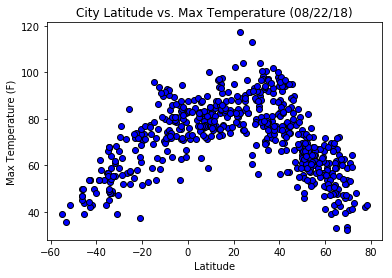

In [25]:
# convert dictionary into a data frame
weatherman_df = pd.DataFrame(weather_df)

#weatherman_df.count()

# set latitude and max temperature
lat_coord = weatherman_df["Lat"]
lat_coord

mtemp = weatherman_df["Max Temp"]
mtemp

# create a scatter plot based upon the above data
plt.scatter(lat_coord, mtemp, marker="o", facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save an image of the chart and print to screen

#plt.savefig("../pictures/Latitude_vs_mtemp_Plot.png")
#plt.show()

## Analysis 1: 

As you move with cities closed to the equator the max tempeature increases prety consistantly. It would be safe to argue that closer to the equator itself, tempeature does increase significantly. For the most part, the inverse is also acurate. The further away you move from the equator, the cooler the max tempeature becomes. 

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

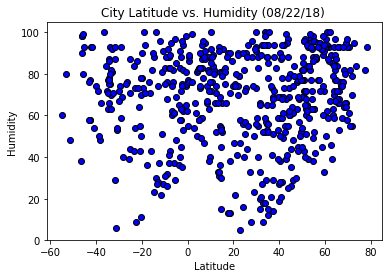

In [28]:
# convert dictionary into a data frame


# set latitude and max temperature
lat_coord = weatherman_df["Lat"]
lat_coord

humidity = weatherman_df["Humidity"]
humidity

# create a scatter plot based upon the above data
plt.scatter(lat_coord, humidity, marker="o", facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity (08/22/18) ")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save an image of the chart and print to screen
#plt.savefig("../pictures/Latitude_vs_humidity_Plot.png")
#plt.show()

## Analysis 2 

The cities humidity level all around tends ot be higher until you get to the very outskirts of the immediate center of the equator. Between 0 and 20 (l) the humidity seems to spike to an all time high. Once you move towards the negatives of the equator, the humidity levels tedn to trickle down and become less humid. 

# Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

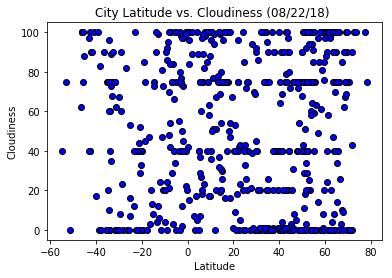

In [14]:
# convert dictionary into a data frame


# set latitude and max temperature
lat_coord = weatherman_df["Lat"]
lat_coord

cloud = weatherman_df["Cloudiness"]
cloud

# create a scatter plot based upon the above data
plt.scatter(lat_coord, cloud, marker="o", facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness (08/22/18) ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save an image of the chart and print to screen
#plt.savefig("../pictures/Latitude_vs_Cloudiness_Plot.png")
#plt.show()

# Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

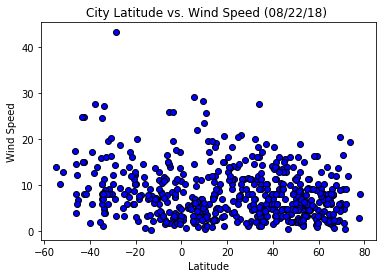

In [15]:
# convert dictionary into a data frame


# set latitude and max temperature
lat_coord = weatherman_df["Lat"]
lat_coord

ws = weatherman_df["Wind Speed"]
ws

# create a scatter plot based upon the above data
plt.scatter(lat_coord, ws, marker="o", facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Wind Speed (08/22/18) ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save an image of the chart and print to screen
#plt.savefig("../pictures/Latitude_vs_WindSpeed_Plot.png")
#plt.show()

## Analysis 3 

Wind speed significantly decreased as you get further towards the positve side of the equator, and seems to stay relitely low no matter where the city is in the world. 